In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
import calendar

In [ ]:
df=pd.read_csv('DATA.csv', encoding='ISO-8859-1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5684 entries, 0 to 5683
Data columns (total 90 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EquableID                          5684 non-null   int64  
 1   System_Name                        5684 non-null   object 
 2   Plan_FullName                      5684 non-null   object 
 3   Plan_InternalName                  5684 non-null   object 
 4   Plan_Shorthand                     5684 non-null   object 
 5   Investment_Fund                    5683 non-null   object 
 6   SSA                                5661 non-null   object 
 7   SSANotes                           597 non-null    object 
 8   Job_Covers                         5684 non-null   object 
 9   StateAbbrev                        5684 non-null   object 
 10  StateName                          5684 non-null   object 
 11  GovtName                           5684 non-null   objec

In [ ]:
df.head()

,EquableID,System_Name,Plan_FullName,Plan_InternalName,Plan_Shorthand,Investment_Fund,SSA,SSANotes,Job_Covers,StateAbbrev,...,StateTotalExpenditures,GDP,InvestmentExpense_SCFNP,InvestmentExpenses,SecuritiesLendingExpense_SCFNP,Professional_ConsultantFees,BrokerCommissions,FundedRatio_GASB,FundedRatio_MVA,MunicipalTag
0,10100,Retirement Systems of Alabama,Alabama Employees' Retirement System,Alabama State & Local,Alabama ERS,Retirement Systems of Alabama,Yes,NaN,"State, Local",AL,...,NaN,,N/R,N/R,N/R,N/R,N/R,#VALUE!,1.066393251,0
1,10100,Retirement Systems of Alabama,Alabama Employees' Retirement System,Alabama State & Local,Alabama ERS,Retirement Systems of Alabama,Yes,NaN,"State, Local",AL,...,"$15,49,00,00,000.00","$1,22,91,55,00,000.00","$15,93,000.00",20974000,385000,537000,2837152.778,#VALUE!,0.900420143,0
2,10100,Retirement Systems of Alabama,Alabama Employees' Retirement System,Alabama State & Local,Alabama ERS,Retirement Systems of Alabama,Yes,NaN,"State, Local",AL,...,"$15,31,30,00,000.00","$1,27,50,50,00,000.00","$23,31,000.00",6758000,333000,1138000,2252057.36,#VALUE!,0.755354084,0
3,10100,Retirement Systems of Alabama,Alabama Employees' Retirement System,Alabama State & Local,Alabama ERS,Retirement Systems of Alabama,Yes,NaN,"State, Local",AL,...,"$15,70,20,00,000.00","$1,34,15,26,00,000.00","$23,80,000.00",N/R,266000,N/R,2654439.247,#VALUE!,0.789516681,0
4,10100,Retirement Systems of Alabama,Alabama Employees' Retirement System,Alabama State & Local,Alabama ERS,Retirement Systems of Alabama,Yes,NaN,"State, Local",AL,...,"$16,02,90,00,000.00","$1,47,71,52,00,000.00","$23,90,000.00",5991000,283000,735000,2867142.931,#VALUE!,0.810123336,0


In [ ]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

EquableID                               0
System_Name                             0
Plan_FullName                           0
Plan_InternalName                       0
Plan_Shorthand                          0
Investment_Fund                         1
SSA                                    23
SSANotes                             5087
Job_Covers                              0
StateAbbrev                             0
StateName                               0
GovtName                                0
ActRptDate                              0
DateFYE                                 0
Month                                  22
Year                                    0
ValReport                             184
ACFR                                  185
DocumentNotes                        4808
MiscellaneousNotes                   5079
Mem_NC                                822
Mem_UAAL                              819
Mem_Tot                               819
Emp_NC                            

In [ ]:
df=df.drop(columns=['SSANotes','StateAbbrev','DocumentNotes','MiscellaneousNotes','ReturnAsOf','Source','ReturnClassification','RollForward','Plan_InternalName','Plan_FullName','System_Name','EquableID' ])

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5684 entries, 0 to 5683
Data columns (total 78 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Plan_Shorthand                     5684 non-null   object 
 1   Investment_Fund                    5683 non-null   object 
 2   SSA                                5661 non-null   object 
 3   Job_Covers                         5684 non-null   object 
 4   StateName                          5684 non-null   object 
 5   GovtName                           5684 non-null   object 
 6   ActRptDate                         5684 non-null   object 
 7   DateFYE                            5684 non-null   object 
 8   Month                              5662 non-null   float64
 9   Year                               5684 non-null   int64  
 10  ValReport                          5500 non-null   float64
 11  ACFR                               5499 non-null   float

Plan_Shorthand                          0
Investment_Fund                         1
SSA                                    23
Job_Covers                              0
StateName                               0
GovtName                                0
ActRptDate                              0
DateFYE                                 0
Month                                  22
Year                                    0
ValReport                             184
ACFR                                  185
Mem_NC                                822
Mem_UAAL                              819
Mem_Tot                               819
Emp_NC                                831
Emp_UAAL                              831
Emp_Tot                               818
NC_Tot                                826
 UAAL_Tot                             828
 AVA                                  534
AAL                                   536
 UAAL                                 534
 FundedRatio_Actuarial            

In [ ]:
df['Investment_Fund'].value_counts()
# sb.countplot(df['Investment_Fund'])
df['Investment_Fund'].replace(np.nan, 'Utah Retirement System', inplace=True)
df['Investment_Fund'].isnull().sum()


0

In [ ]:

# sb.countplot(df['SSA'])
df['SSA'].replace(np.nan, 'Yes', inplace=True)
df['SSA'].isnull().sum()


0

In [ ]:
# df['Month'].value_counts()
# sb.displot(df['Month'])
df['Month'].replace(np.nan, df['Month'].mode()[0], inplace=True)
df['Month'].isnull().sum()

0

0

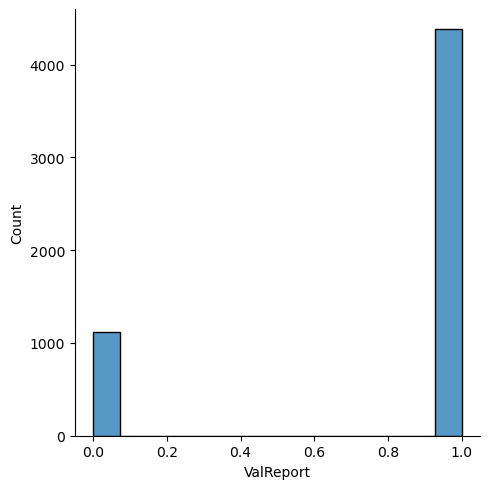

In [ ]:
sb.displot(df['ValReport'])
df['ValReport'].isnull().sum()
df['ValReport'].replace(np.nan, df['ValReport'].mode()[0], inplace=True)
df['ValReport'].isnull().sum()

0

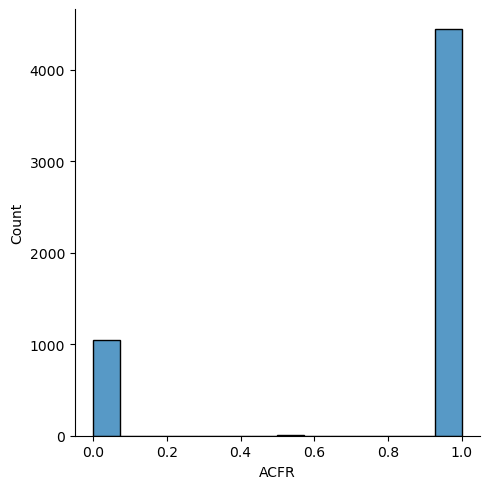

In [ ]:
sb.displot(df['ACFR'])
df['ACFR'].isnull().sum()
df['ACFR'].replace(np.nan, df['ACFR'].mode()[0], inplace=True)
df['ACFR'].isnull().sum()

In [ ]:
df.shape

(5684, 78)

In [ ]:
df.isnull().sum()

Plan_Shorthand                          0
Investment_Fund                         0
SSA                                     0
Job_Covers                              0
StateName                               0
GovtName                                0
ActRptDate                              0
DateFYE                                 0
Month                                   0
Year                                    0
ValReport                               0
ACFR                                    0
Mem_NC                                822
Mem_UAAL                              819
Mem_Tot                               819
Emp_NC                                831
Emp_UAAL                              831
Emp_Tot                               818
NC_Tot                                826
 UAAL_Tot                             828
 AVA                                  534
AAL                                   536
 UAAL                                 534
 FundedRatio_Actuarial            

In [ ]:
df1=df[['Plan_Shorthand','Investment_Fund','SSA','Job_Covers','StateName','GovtName','ActRptDate','DateFYE','Month','Year','ValReport','ACFR','Mem_NC']]

In [ ]:
df1 = df1.dropna()

In [ ]:
df1 = df1[(df1['Mem_NC'] != 'N/R') & (df1['Mem_NC'] != 'DNE')]

In [ ]:
df1.to_csv('op.csv')

In [ ]:
df1['Mem_NC'] = pd.to_numeric(df['Mem_NC'], errors='coerce')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4572 entries, 1 to 5681
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Plan_Shorthand   4572 non-null   object 
 1   Investment_Fund  4572 non-null   object 
 2   SSA              4572 non-null   object 
 3   Job_Covers       4572 non-null   object 
 4   StateName        4572 non-null   object 
 5   GovtName         4572 non-null   object 
 6   ActRptDate       4572 non-null   object 
 7   DateFYE          4572 non-null   object 
 8   Month            4572 non-null   float64
 9   Year             4572 non-null   int64  
 10  ValReport        4572 non-null   float64
 11  ACFR             4572 non-null   float64
 12  Mem_NC           4572 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 500.1+ KB


In [ ]:
object_features=df1.select_dtypes(include='object').columns.tolist()
print(object_features,len(object_features))

['Plan_Shorthand', 'Investment_Fund', 'SSA', 'Job_Covers', 'StateName', 'GovtName', 'ActRptDate', 'DateFYE'] 8


In [ ]:
df2=pd.get_dummies(df1,columns=object_features, prefix=object_features,drop_first=False, )

In [ ]:
m=df2.columns

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4572 entries, 1 to 5681
Columns: 900 entries, Month to DateFYE_31-12-2024
dtypes: bool(895), float64(4), int64(1)
memory usage: 4.1 MB


In [ ]:
x = df2.drop('Mem_NC',axis =1)
y = df2['Mem_NC']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=56)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

In [ ]:
linear_reg.fit(train_x, train_y)
train_predict = linear_reg.predict(train_x)
test_predict = linear_reg.predict(test_x)
mse_test = mean_squared_error(test_y, test_predict)
mae_test = mean_absolute_error(test_y, test_predict)
r2_test = r2_score(test_y, test_predict)

print('Mean Squared Error (MSE):', mse_test)
print('Mean Absolute Error (MAE):', mae_test)
print('R-squared (R^2) Score:', r2_test)

Mean Squared Error (MSE): 162888940406281.3
Mean Absolute Error (MAE): 1124085.5658147277
R-squared (R^2) Score: -1.7967237739277002e+17
